In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv('in/zad1_wch_5.txt', sep='\t', decimal=',')
df

,r,U
0,1.75,80.501217
1,1.76,74.604359
2,1.77,69.135185
3,1.78,64.061605
4,1.79,59.354055
...,...,...
1696,18.71,-0.000003
1697,18.72,-0.000003
1698,18.73,-0.000003
1699,18.74,-0.000003


<AxesSubplot:xlabel='r'>

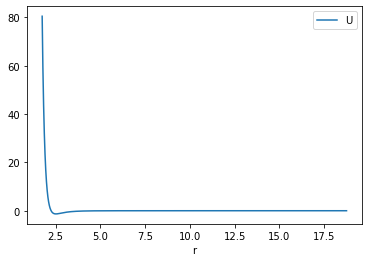

In [41]:
df.plot(x='r', y='U')

In [33]:
U_min = df['U'].min()
r_min = df['r'].loc[df['U'] == U_min]
r_min = r_min.min()

print("U_min =", U_min)
print("r_min =", r_min)

U_min = -1.31898489
r_min = 2.52


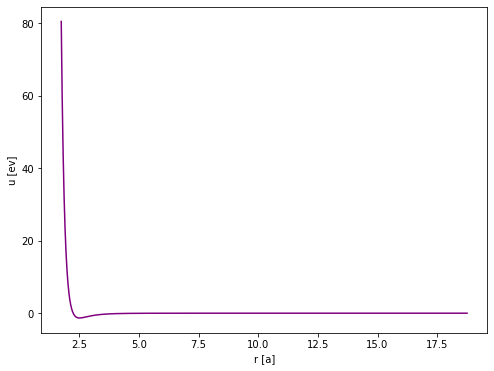

In [40]:

plt.figure(figsize=(8,6))
plt.plot(df['r'], df['U'], color = 'purple')

plt.xlabel('r [a]')
plt.ylabel('u [ev]')

plt.show()

In [91]:
df_short = df[30:120].copy()
fit = np.polyfit(x=df_short['r'], y=df_short['U'], deg=3)
fit

array([ -43.67439966,  346.95183451, -915.28362685,  800.63488824])

In [94]:
x_fit = np.arange(1.5,3.1,0.01)
y_fit = fit[0]*x_fit**3 + fit[1]*x_fit**2 + fit[2]*x_fit + fit[3]


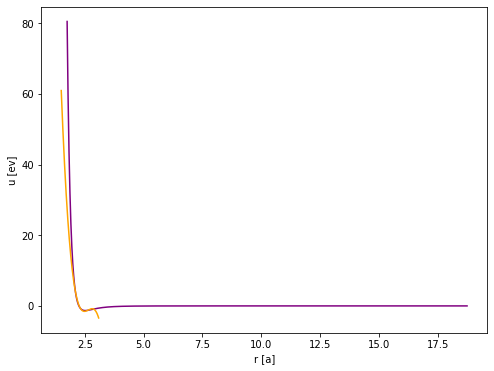

k = 346.9518345098248 [eV/A^2] =  5558.1683888473935 [N/m]
x = -43.67439965504554 [eV/A^3] =  -6996638824738.296 [N/m^2]


In [99]:
plt.figure(figsize=(8,6))
plt.plot(df['r'], df['U'], color = 'purple')
plt.plot(x_fit, y_fit, color = 'orange')

plt.xlabel('r [a]')
plt.ylabel('u [ev]')

plt.show()

print('k =', fit[1], '[eV/A^2] = ', fit[1]*1.602*1e-19/1e-20, '[N/m]')
print('x =', fit[0], '[eV/A^3] = ', fit[0]*1.602*1e-19/1e-30, '[N/m^2]')